In [23]:
import numpy as np
from scipy.stats import *
from sympy import *
from IPython.display import Math
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

def rrstr(x,n): # округление до n знаков после запятой
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')

v_rrstr = np.vectorize(rrstr)

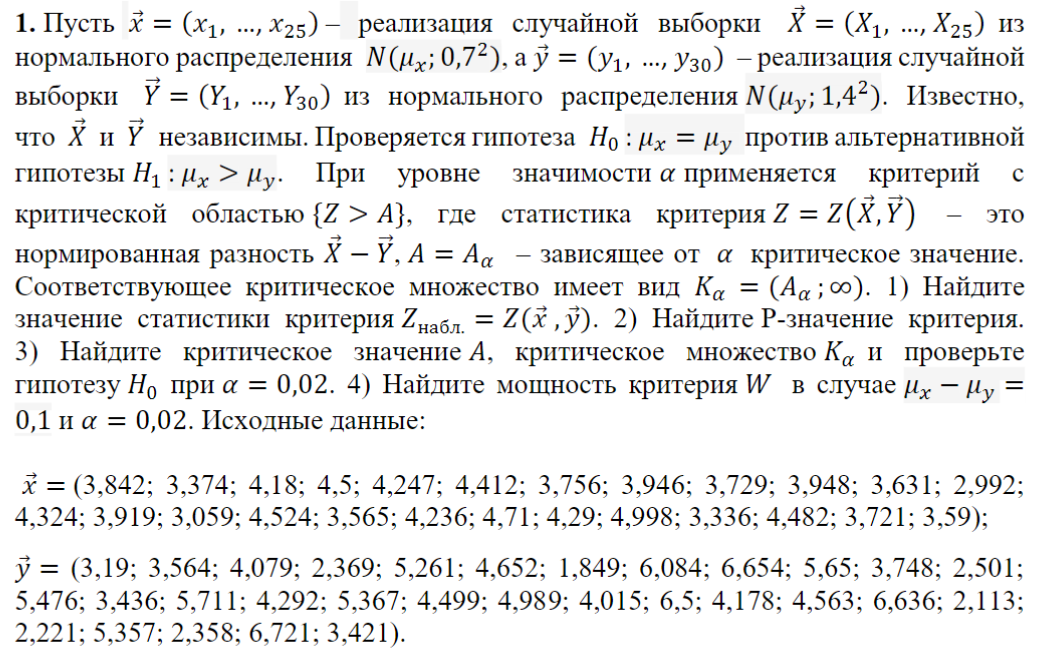

In [32]:
x = '(3,842;  3,374;  4,18;  4,5;  4,247;  4,412;  3,756;  3,946;  3,729;  3,948;  3,631;  2,992; 4,324; 3,919; 3,059; 4,524; 3,565; 4,236; 4,71; 4,29; 4,998; 3,336; 4,482; 3,721; 3,59)'
y = '(3,19;  3,564;  4,079;  2,369;  5,261;  4,652;  1,849;  6,084;  6,654;  5,65;  3,748;  2,501; 5,476;  3,436;  5,711;  4,292;  5,367;  4,499;  4,989;  4,015;  6,5;  4,178;  4,563;  6,636; 2,113; 2,221; 5,357; 2,358; 6,721; 3,421)'

x = np.array(x[1:-1].replace(',','.').split('; ')).astype(float)
y = np.array(y[1:-1].replace(',','.').split('; ')).astype(float)

sigma_x = 0.7
sigma_y = 1.4

alpha = 0.02

x_sr = x.mean()
y_sr = y.mean()
varx = 0.7**2
vary = 1.4**2
m = x.size
n = y.size

Z = (x_sr - y_sr)/(varx/m + vary/n)**0.5

display(Z)

p_val = (norm.sf((Z)))
display(p_val)

cr = norm.isf(alpha)
display(cr)



Z1 = (0.1) / np.sqrt(varx / m + vary / n)
w = norm.sf(cr-Z1)
display(w)

-1.4046441651782242

0.9199364416984964

2.053748910631823

0.04357590524308271

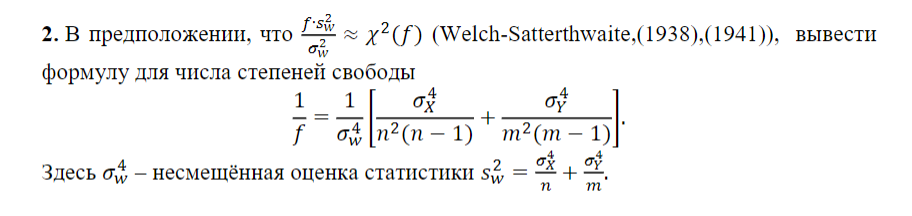

$$
\frac{1}{f} = \frac{1}{s^4_w} \left( \frac{\sigma^4_X}{n^2(n-1)} + \frac{\sigma^4_Y}{m^2(m-1)} \right) \equiv \frac{1}{f} = \frac{1}{s^4_w} \left( \frac{\sigma^4_X}{n^2(n-1)} + \frac{\sigma^4_Y}{m^2(m-1)} \right)
$$
Что и требовалось доказать

[См. Гмурман](https://www.nntu.ru/frontend/web/ngtu/files/org_structura/library/resurvsy/pervokursnik/its/matem/osnovn/2.pdf)

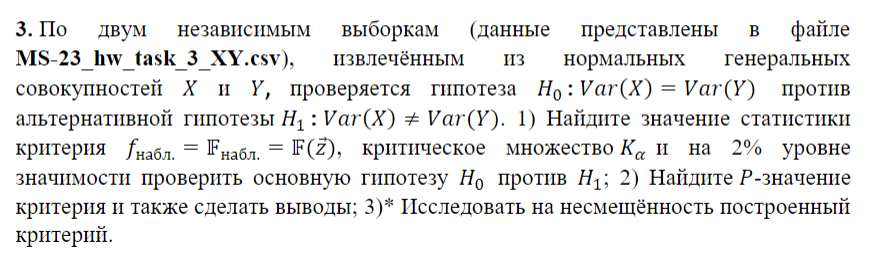

In [39]:
p = pd.read_csv('MS-23_hw_task_3_XY.csv',delimiter=';',header=None)
p = p.apply(lambda i: np.float64(i.str.replace(',','.')))

X = p[0].dropna()
Y = p[1].dropna()

sx = X.var(ddof=1)
sy = Y.var(ddof=1)

alpha=0.02

F = sx/sy
if sx > sy:
    k1 = len(Y) - 1
    k2 = len(X) - 1
else:
    F = 1/F
    k1 = len(X) - 1
    k2 = len(Y) - 1
  
f_cr_low = f.ppf(alpha/2,k1,k2)
f_cr_high= f.isf(alpha/2,k1,k2)

p_val = 2*min(f.cdf(F,k1,k2),1 - f.cdf(F,k1,k2))

print(f'1) f критическое = {F:.6f}')
print(f'2) p-значение = {p_val}')
print('H0 не отвергается' if p_val>=alpha else 'H0 отвергается')
print(f'3) [(0;{f_cr_low:.6f}) U ({f_cr_high:.6f}; {np.inf})]')


1) f критическое = 3.750613
2) p-значение = 0.03923252340678007
H0 не отвергается
3) [(0;0.270934) U (4.520448; inf)]
